# **Linear Regression from Scratch**

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

## Model Representation

The representation is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y). As such, both the input values (x) and the output value are numeric.

The linear equation assigns one scale factor to each input value or column, called a coefficient and represented by the capital Greek letter Beta. One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the intercept or the bias coefficient.

![alt text](https://cdn-images-1.medium.com/max/1436/1*_TqRJ9SmwFzRigJhMiN2uw.png)

In higher dimensions when we have more than one input (x), the line is called a plane or a hyper-plane



## Cost function

The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c (b used in mathematical representation).
We will use the Mean Squared Error function to calculate the loss.

![alt text](https://miro.medium.com/max/800/1*3cpC7oHy4IbH3o3Jc-ygVw.jpeg)

In [0]:
# Cost function

def cost_function(m, b, x, y):
  totalError = 0
  for i in range(0 , len(x)):
    totalError += (y[i] - (m * x[i] + b))**2
  return totalError/float(len(x))

## Impementing gradient descent

Gradient descent is the process of minimizing a function by following the gradient of the cost function.

**m** is considered the current position and the **gradient values**(D) is equivalent to the steepness of the slope and **learning rate**(L) is the speed with which movement is. Now the new value of **m** calculated will be the new postion and L*D will be the size of the steps, when the slope is steep, D is more and we need longer steps to be taken. Finally, we reach to the bottom which corresponds to loss = 0.

In [0]:
# Implementing the gradient descent algorithm

def gradient_descent(b, m, x, y, learning_rate, num_iterations):
  N = float(len(x))
  for j in range(num_iterations):
    b_gradient = 0
    m_gradient = 0
    for i in range(0, len(x)):
      b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
      m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
    b -= (learning_rate * b_gradient)
    m -= (learning_rate * m_gradient)
    # In every 100 iteration, print the error
    if j % 100 == 0:
        print('MSE after ' + str(j) + ' iterations: ' + str(cost_function(m, b, x, y)))
  return [b, m]

## Testing our GD algorithm 

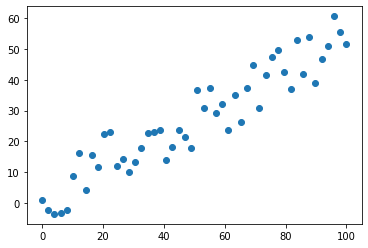

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Let's create a random dataset
x = np.linspace(0, 100, 50)
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta

plt.scatter(x, y)

In [8]:
# Initializing the learning rate
learning_rate = 0.0001

# Initializing values of b and m
initial_b = 0
initial_m = 0

# Setting the number of iterations
num_iterations = 1000

print('Initial MSE: ', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate,
                          num_iterations)
print('b: ', b)
print('m: ', m)
print('MSE: ', cost_function(m, b, x, y))

Initial MSE:  1027.4587854229746
MSE after 0 iterations: 139.67934773115542
MSE after 100 iterations: 33.8330858948829
MSE after 200 iterations: 33.83308551316883
MSE after 300 iterations: 33.833085135366616
MSE after 400 iterations: 33.83308476143619
MSE after 500 iterations: 33.83308439133784
MSE after 600 iterations: 33.83308402503234
MSE after 700 iterations: 33.833083662480774
MSE after 800 iterations: 33.83308330364469
MSE after 900 iterations: 33.83308294848602
b:  0.007457848521302401
m:  0.5430989073662759
MSE:  33.83308260046436


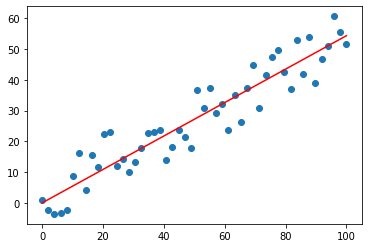

In [9]:
# Plotting the regression line

predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color = 'red')

## Now using in-built function(sklearn)

In [10]:
from sklearn.linear_model import  LinearRegression

print(x.shape)
x = x.reshape(-1, 1)
print(x.shape)

(50,)
(50, 1)


In [11]:
# Creating the model
model = LinearRegression()

# Fitting the model to our input data x and y
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Y intercept: ', model.intercept_) #b
print('Gradient: ', model.coef_) #m

Y intercept:  -0.004023282135523942
Gradient:  [0.5432694]


In [0]:
# Storing all predictions in y_pred
y_pred = model.predict(x)

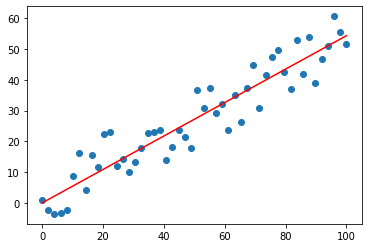

In [15]:
plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')

In [16]:
# Determining the MSE
from sklearn.metrics import  mean_squared_error

print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))

Mean squared error: 33.83


# Linear Regression a Single variable

In [18]:
import pandas as pd
import seaborn as sns

file_name = "filename.csv"
df = pd.read_csv(file_name)
df.head(40)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


In [22]:
# Format the data into correct format

x = df['year']
x_train = np.array(x).reshape(-1, 1)
print(x.shape)
print(x_train.shape)

(29,)
(29, 1)


In [23]:
y_train = np.array(df['time'])
y_train.shape

(29,)

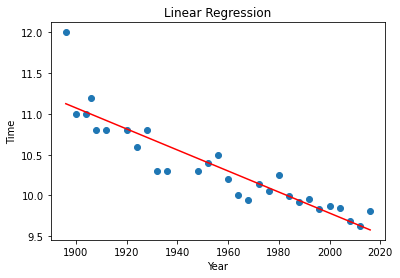

In [39]:
# Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

#Prediction
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color = 'red')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Time')
plt.show()

In [52]:
# Predict for 2020 olympics

x_2020 = np.array([2020]).reshape(-1, 1)
pred_2020 = model.predict(x_2020)[0]
print('Time at 2020: ', pred_2020)

Time at 2020:  9.526795250391455


## Polynomial Regression

In [31]:
file_name = "filename.csv"
df = pd.read_csv(file_name)
df.head(7)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [0]:
# Extract x(Temprature) and y(Pressure) values
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [37]:
# Fitting Polynomial Regression to the dataset 
# Fitting the Polynomial Regression model on two components X and y.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9)
model_Poly = poly.fit_transform(x)

lin_poly = LinearRegression()
lin_poly.fit(model_Poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

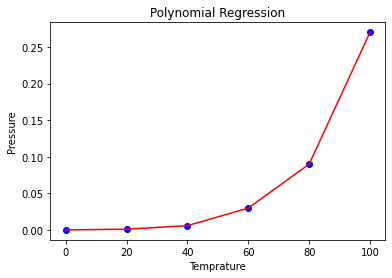

In [38]:
# Visualizing the polynomial regression results

plt.scatter(x, y, color = 'blue')
plt.plot(x, lin_poly.predict(model_Poly), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temprature')
plt.ylabel('Pressure')
plt.show()

## Multivariate Linear Regression

In [40]:
file_name = "filename.csv"
auto_df = pd.read_csv(file_name)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [41]:
# Check for the rows that contain '?'
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [0]:
# Delete the rows with '?'
indexNames = auto_df[auto_df['horsepower'] == '?'].index
auto_df.drop(indexNames, inplace = True)

In [43]:
auto_df.horsepower = auto_df.horsepower.astype(float)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [0]:
# Extracting x and y values
x = auto_df.iloc[:, 1:8].values
y = auto_df.iloc[:, 0].values

In [45]:
x.shape

(392, 7)

In [46]:
y.shape

(392,)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                    random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Trail data for Honda Prelude: actual mpg is 24
Trial_data = np.array([8, 220, 195, 3042, 6.7, 98, 3])
Trial_data = Trial_data.reshape(-1, 7)
Trial_data = Trial_data.astype(float)

In [50]:
regressor.predict(Trial_data)[0]

37.86321409762151